# Add 50% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 50)

Outliers found:


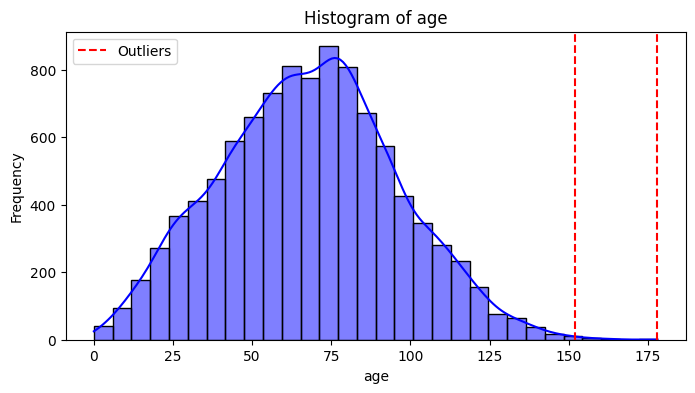

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1541
           1       0.85      0.90      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Node Labels:
 Annotation(0.630298, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3486.0, 3502.0]\nclass = 1')


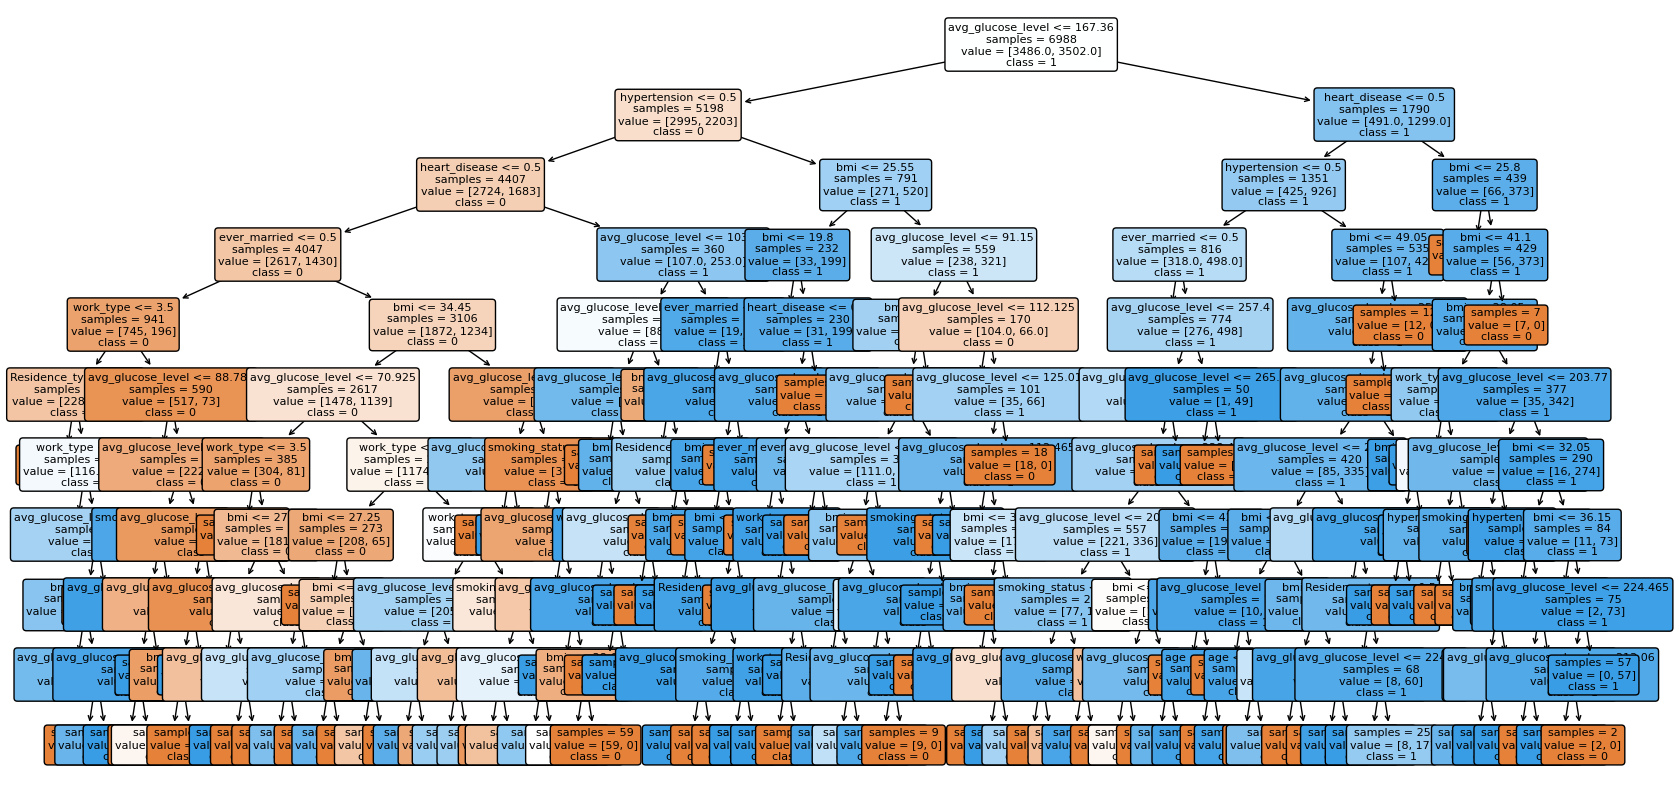

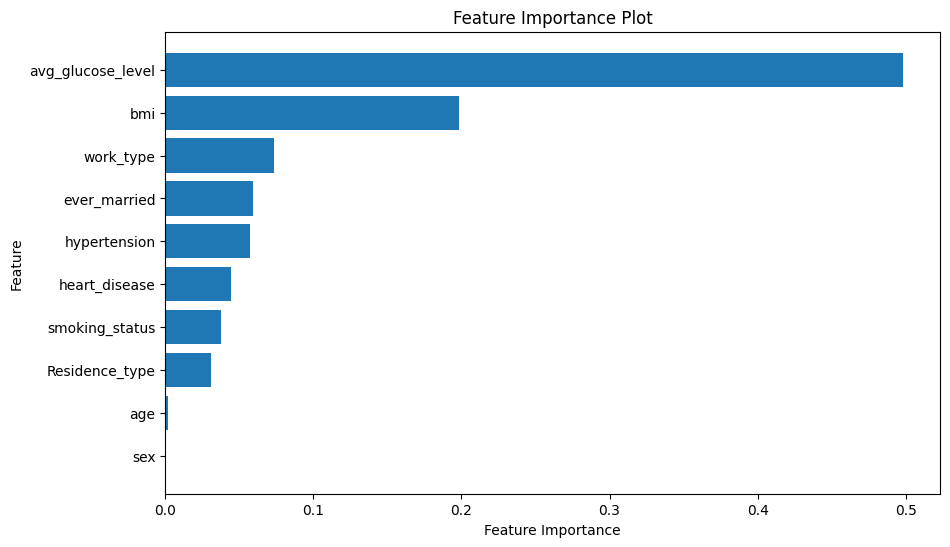

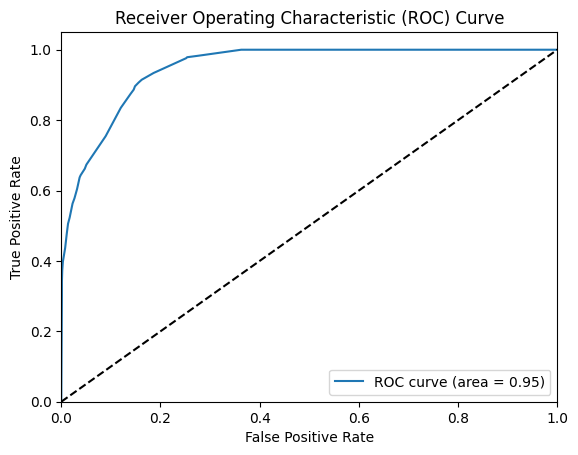

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9486897649805655
Accuracy for each fold: [0.7833333333333333, 0.8133333333333334, 0.8, 0.8166666666666667, 0.8133333333333334, 0.81, 0.7959866220735786, 0.8327759197324415, 0.802675585284281, 0.7993311036789298]
Mean accuracy: 0.8067435897435897
95% confidence interval: (0.7970449241390672, 0.8164422553481122)


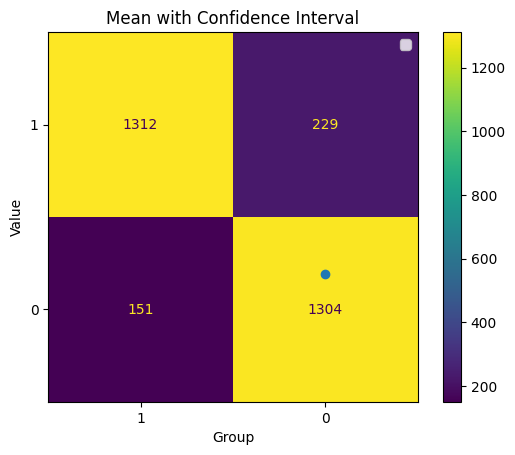

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



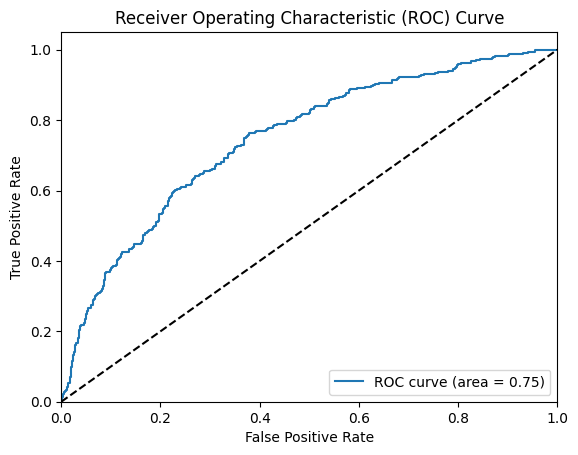

AUC Score: 0.7450742700660749


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7033333333333334, 0.6833333333333333, 0.6933333333333334, 0.6266666666666667, 0.66, 0.69, 0.6989966555183946, 0.6755852842809364, 0.6488294314381271, 0.6555183946488294]
Mean accuracy: 0.6735596432552955
95% confidence interval: (0.6556927195100634, 0.6914265670005276)


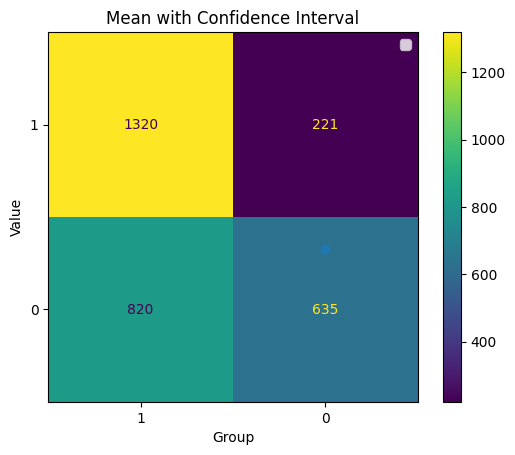

In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1541
           1       0.85      0.90      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Node Labels:
 Annotation(0.630298, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3486.0, 3502.0]\nclass = 1')


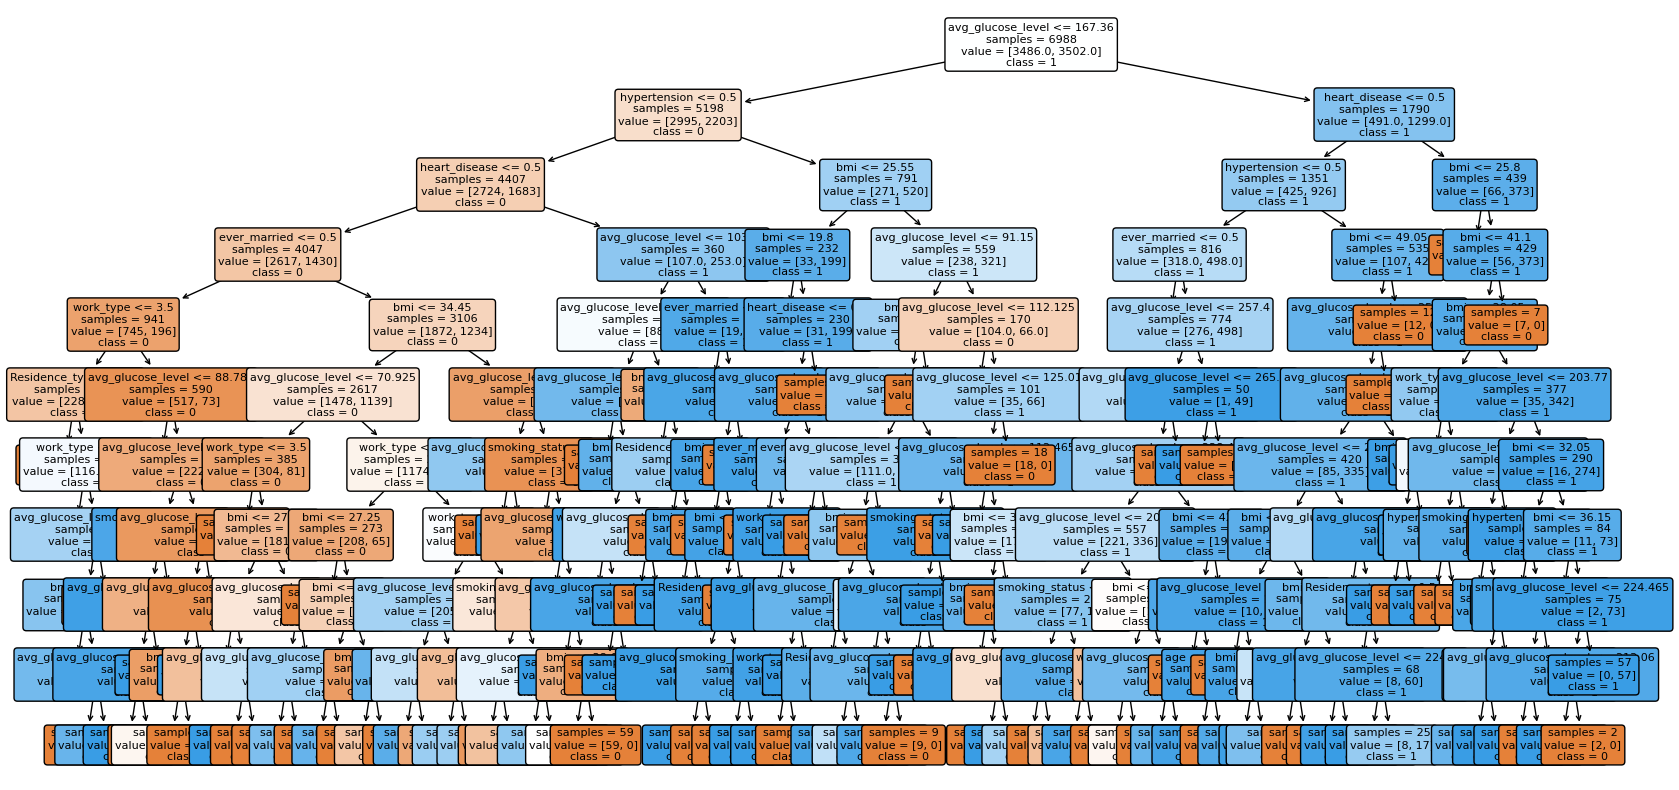

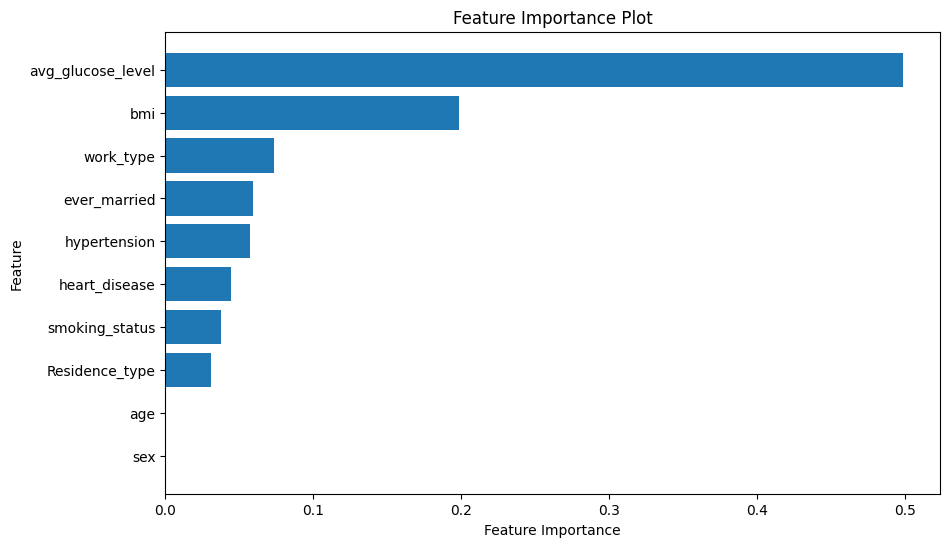

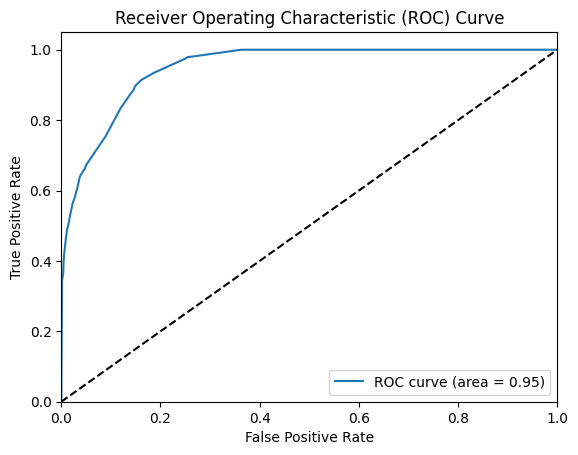

AUC Score: 0.9486068090743056


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8366666666666667, 0.8133333333333334, 0.8033333333333333, 0.82, 0.78, 0.83, 0.7993311036789298, 0.8361204013377926, 0.8294314381270903, 0.8260869565217391]
Mean accuracy: 0.8174303232998886
95% confidence interval: (0.8042677534308386, 0.8305928931689387)


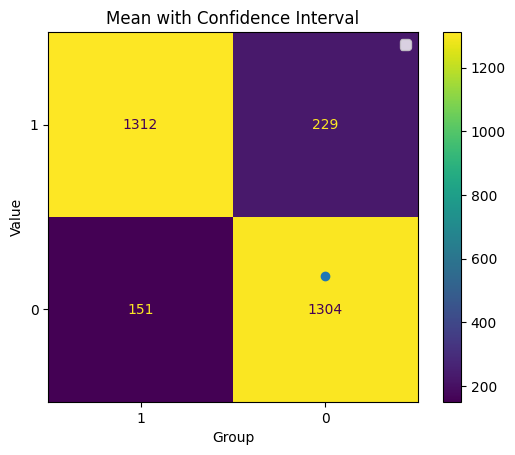

In [10]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



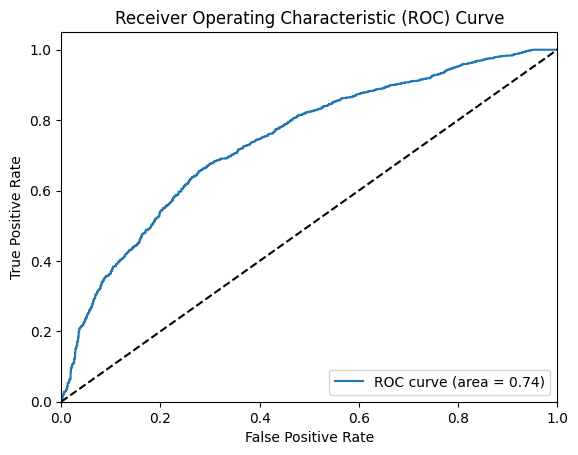

AUC Score: 0.7408011488947017


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.66, 0.6666666666666666, 0.7, 0.5966666666666667, 0.65, 0.6866666666666666, 0.7224080267558528, 0.6354515050167224, 0.705685618729097, 0.6923076923076923]
Mean accuracy: 0.6715852842809364
95% confidence interval: (0.6446572387126592, 0.6985133298492137)


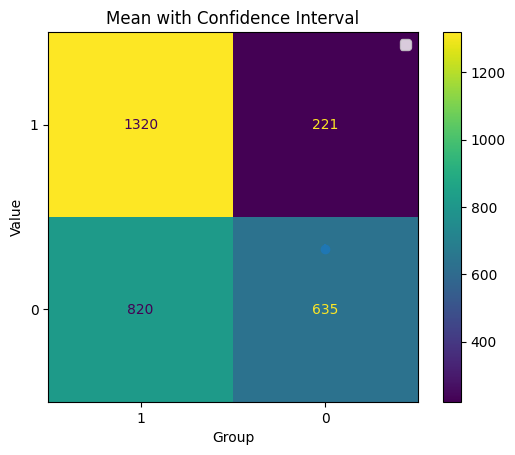

--------------------------------------


In [11]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)

Outliers found:


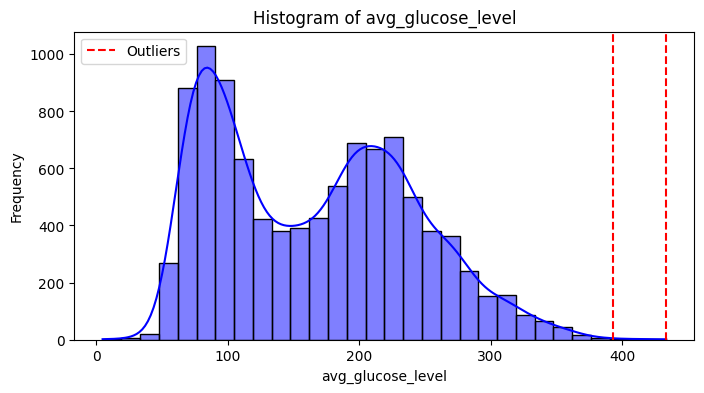

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1541
           1       0.74      0.84      0.79      1455

    accuracy                           0.78      2996
   macro avg       0.78      0.78      0.78      2996
weighted avg       0.78      0.78      0.78      2996

Node Labels:
 Annotation(0.61297, 0.954545, 'heart_disease <= 0.5\nsamples = 6988\nvalue = [3447, 3541]\nclass = 1')


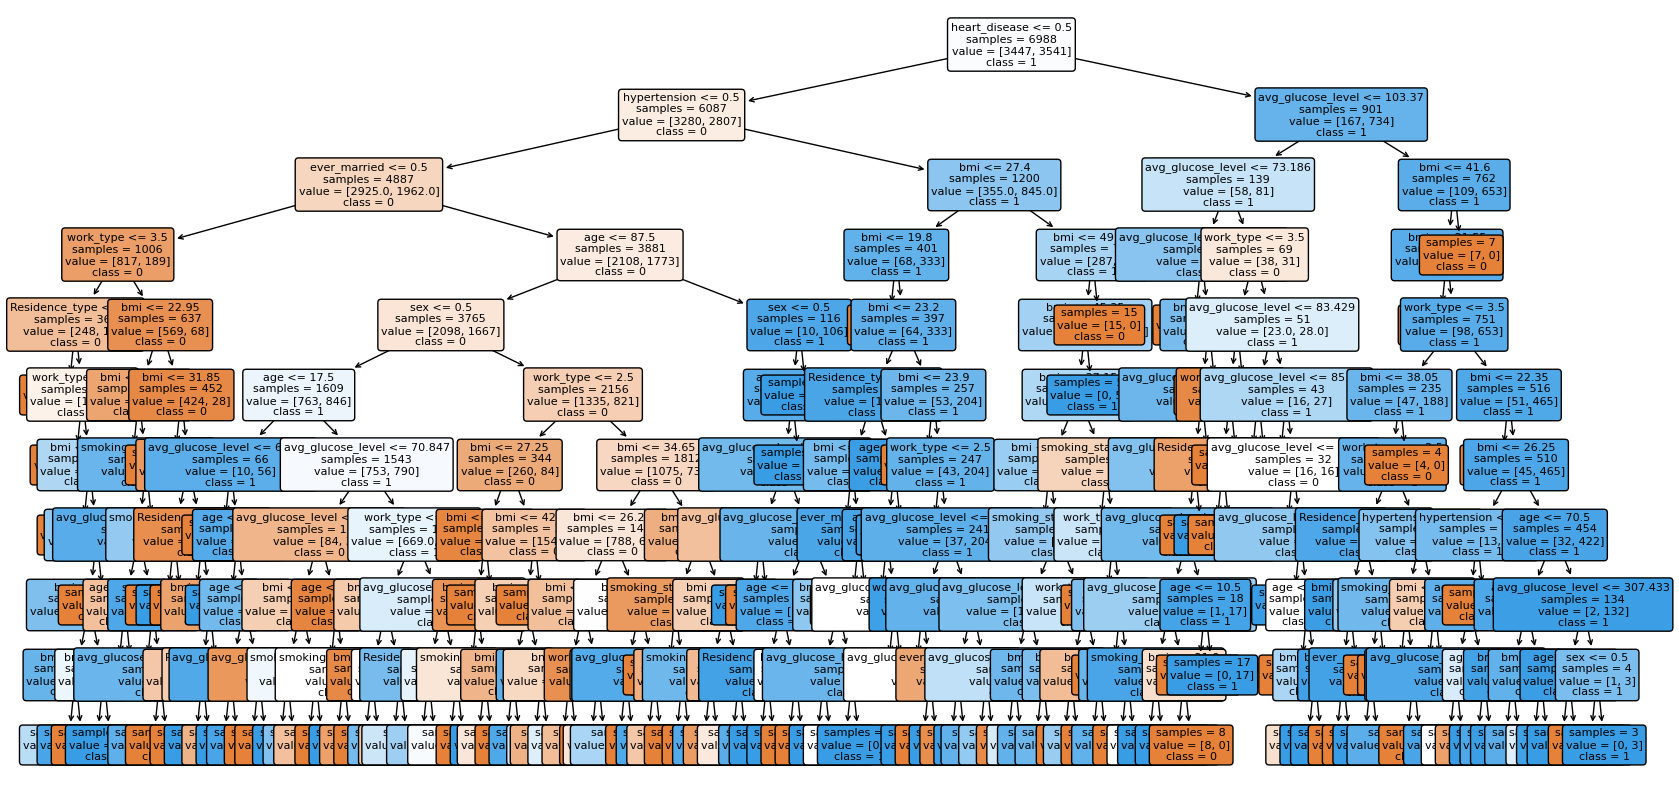

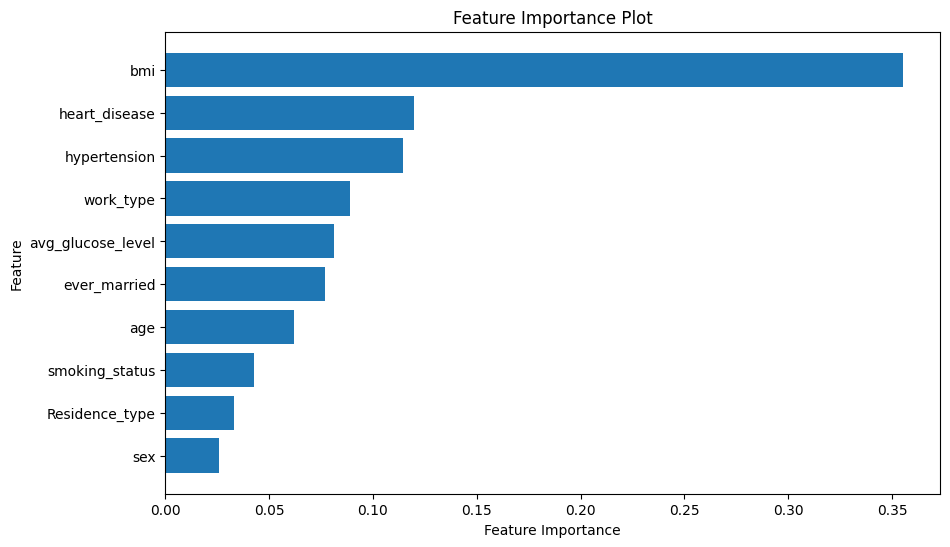

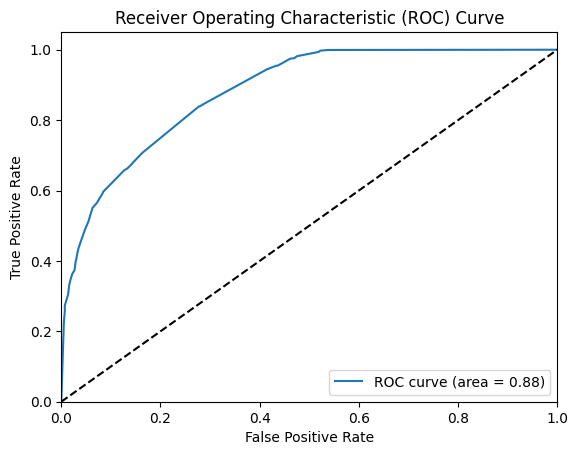

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.8811551832946429
Accuracy for each fold: [0.7933333333333333, 0.8066666666666666, 0.81, 0.7866666666666666, 0.7933333333333333, 0.8, 0.802675585284281, 0.7959866220735786, 0.8127090301003345, 0.8193979933110368]
Mean accuracy: 0.8020769230769231
95% confidence interval: (0.7948088493234144, 0.8093449968304318)


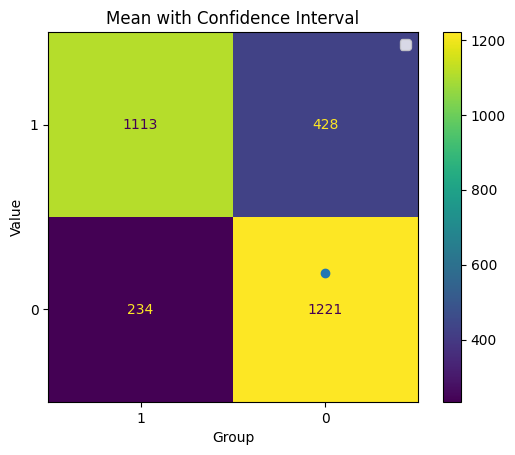

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



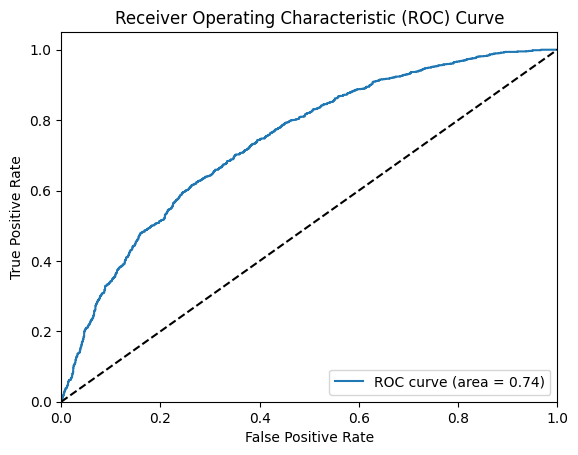

AUC Score: 0.7400010257988409


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7, 0.6766666666666666, 0.7166666666666667, 0.7, 0.61, 0.6433333333333333, 0.6789297658862876, 0.6287625418060201, 0.6588628762541806, 0.68561872909699]
Mean accuracy: 0.6698840579710145
95% confidence interval: (0.6454715635242128, 0.6942965524178162)


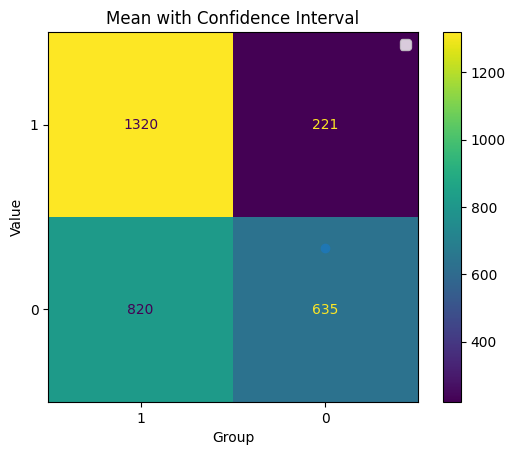

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1541
           1       0.74      0.84      0.79      1455

    accuracy                           0.78      2996
   macro avg       0.78      0.78      0.78      2996
weighted avg       0.78      0.78      0.78      2996

Node Labels:
 Annotation(0.635269, 0.954545, 'heart_disease <= 0.5\nsamples = 6988\nvalue = [3447, 3541]\nclass = 1')


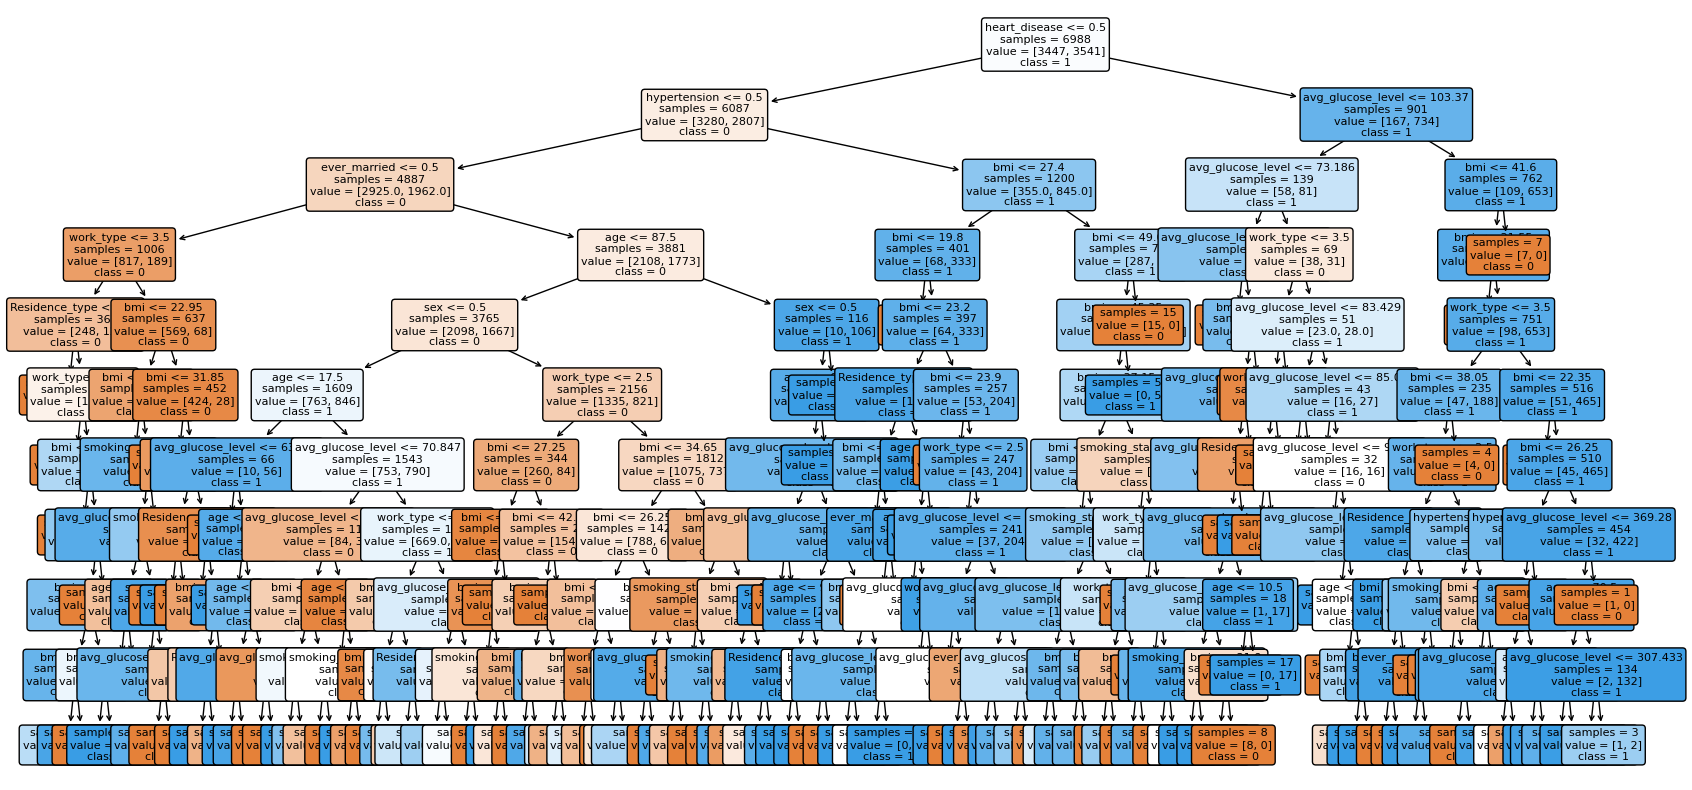

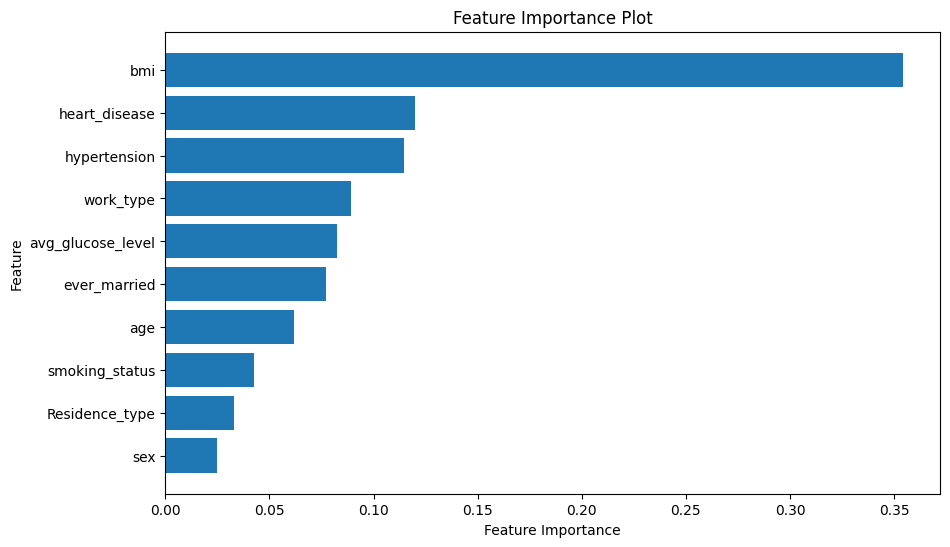

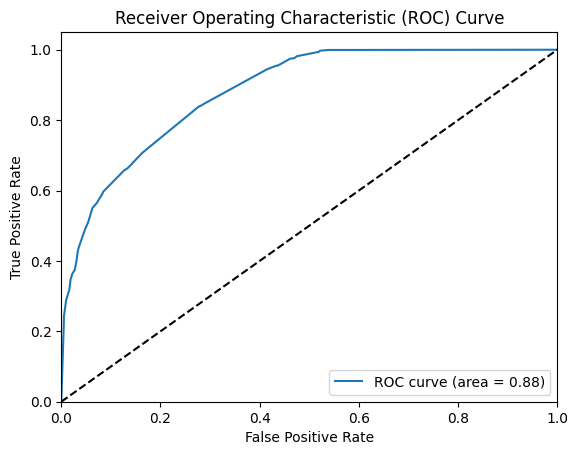

AUC Score: 0.8810972033601602


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.81, 0.7866666666666666, 0.7933333333333333, 0.7866666666666666, 0.81, 0.8, 0.7959866220735786, 0.8127090301003345, 0.8294314381270903, 0.8193979933110368]
Mean accuracy: 0.8044191750278709
95% confidence interval: (0.7942329703170695, 0.8146053797386722)


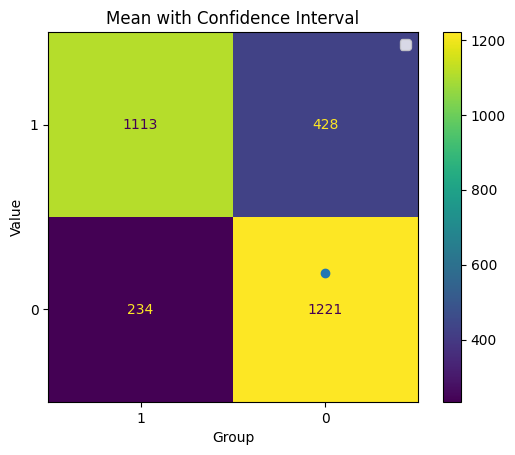

In [20]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



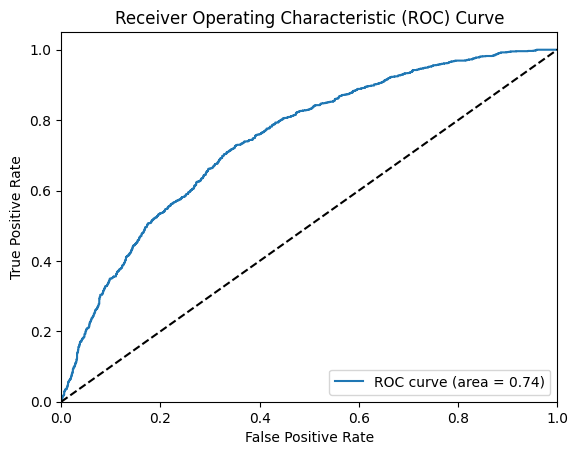

AUC Score: 0.7448066703684625


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6333333333333333, 0.6566666666666666, 0.71, 0.75, 0.6466666666666666, 0.6533333333333333, 0.6454849498327759, 0.6287625418060201, 0.6822742474916388, 0.6622073578595318]
Mean accuracy: 0.6668729096989966
95% confidence interval: (0.6399377662192235, 0.6938080531787697)


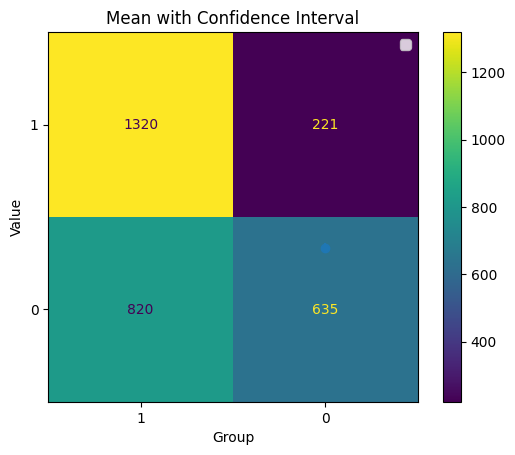

--------------------------------------


In [21]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


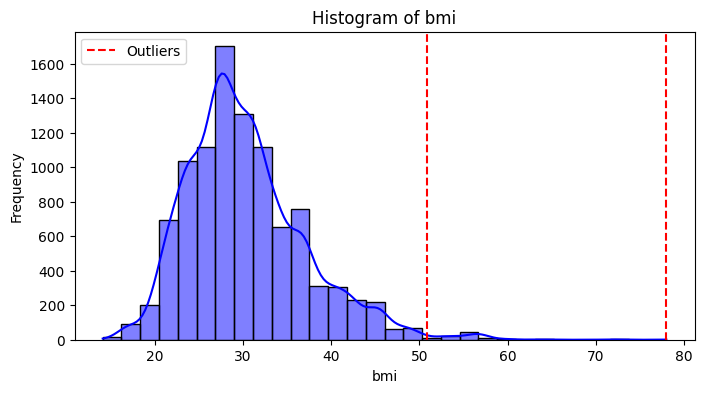

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 50)

Outliers found:


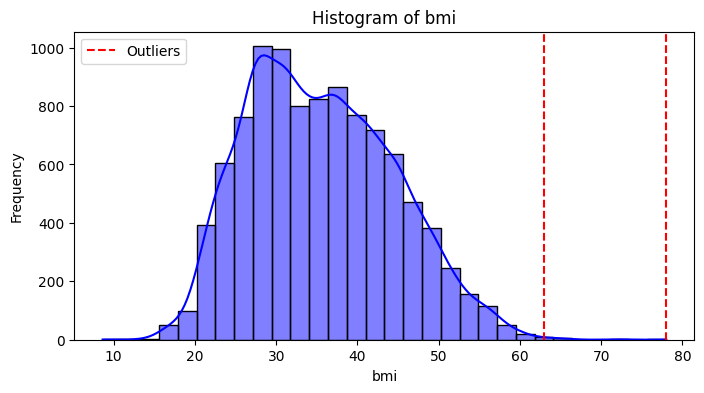

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1541
           1       0.88      0.74      0.80      1455

    accuracy                           0.82      2996
   macro avg       0.83      0.82      0.82      2996
weighted avg       0.83      0.82      0.82      2996

Node Labels:
 Annotation(0.624883, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3499, 3489]\nclass = 0')


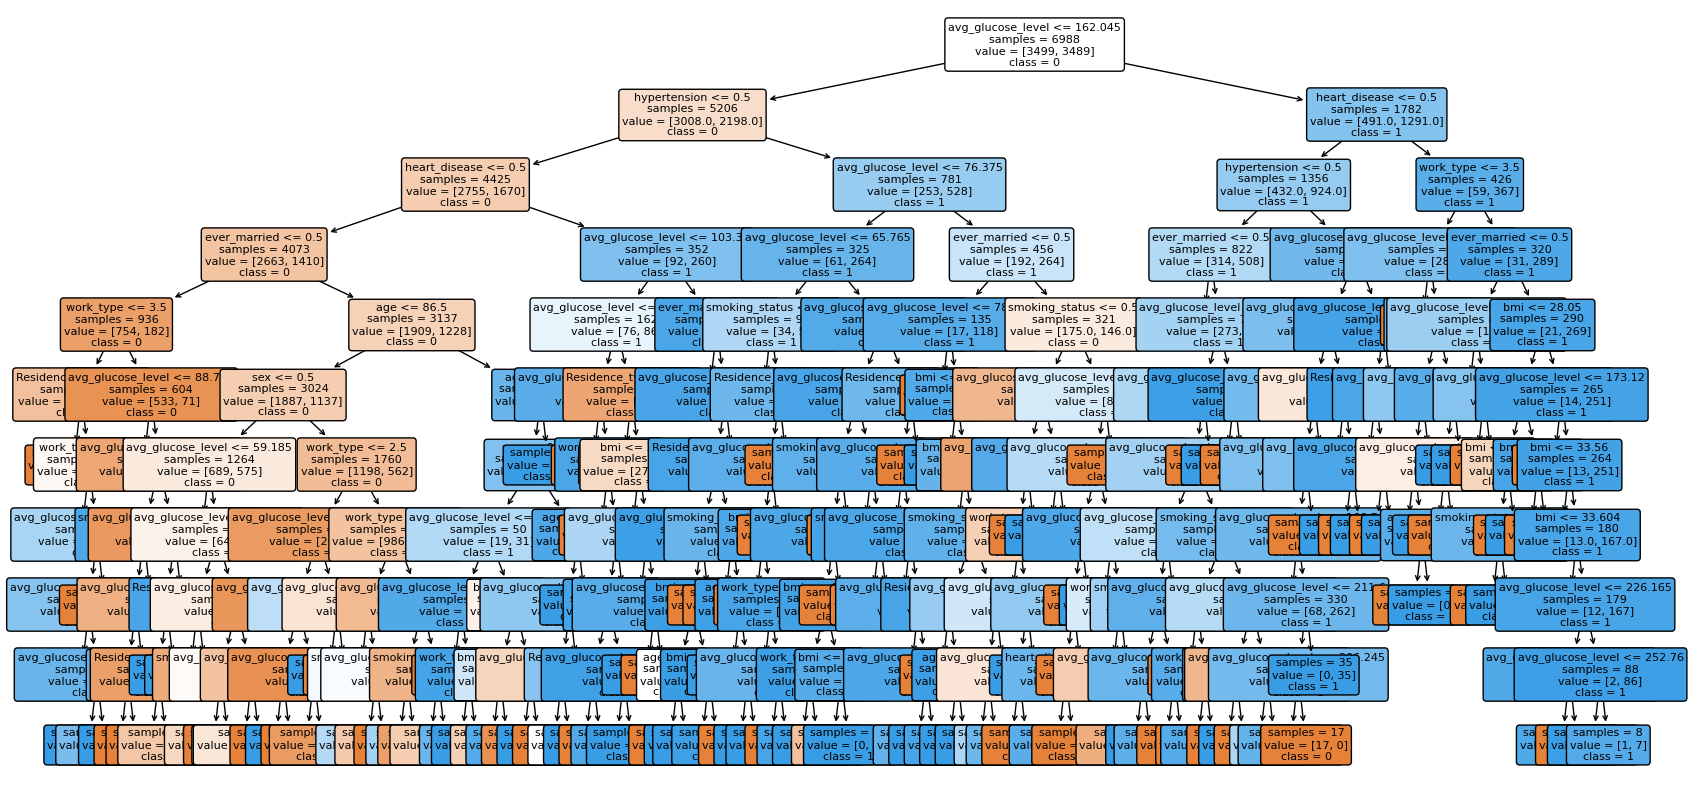

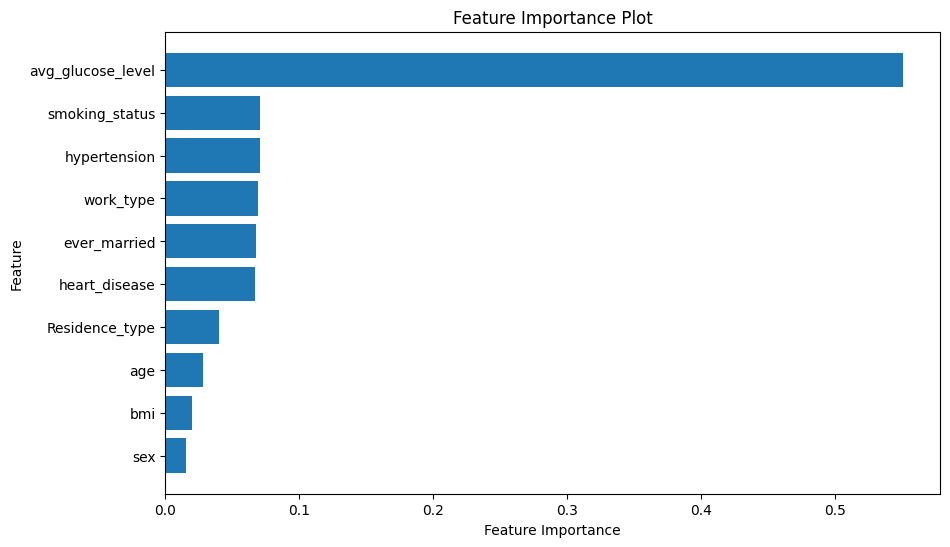

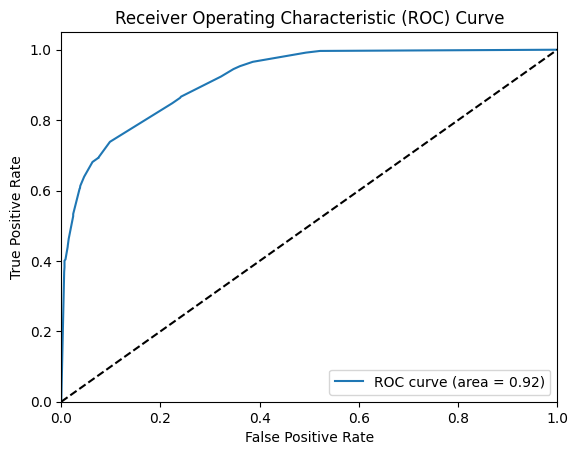

AUC Score: 0.916717176109591


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.81, 0.7966666666666666, 0.8233333333333334, 0.8366666666666667, 0.81, 0.7666666666666667, 0.8127090301003345, 0.8327759197324415, 0.8093645484949833, 0.802675585284281]
Mean accuracy: 0.8100858416945373
95% confidence interval: (0.7959295188046497, 0.824242164584425)


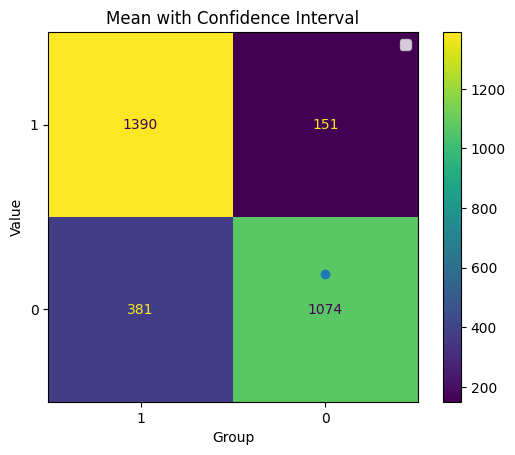

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



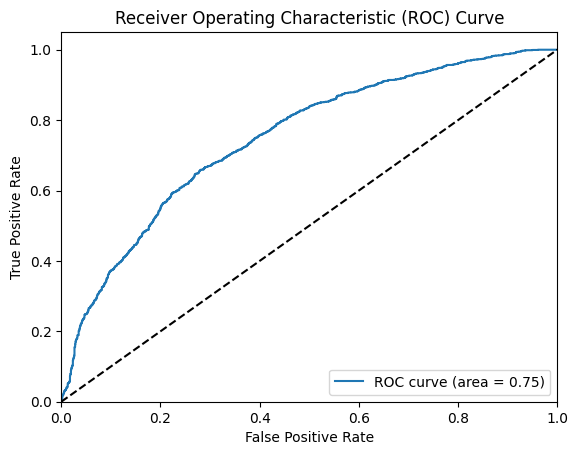

AUC Score: 0.7480691566818529


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6733333333333333, 0.7033333333333334, 0.69, 0.6733333333333333, 0.6533333333333333, 0.67, 0.6588628762541806, 0.6655518394648829, 0.6421404682274248, 0.6153846153846154]
Mean accuracy: 0.6645273132664438
95% confidence interval: (0.6469813332247261, 0.6820732933081615)


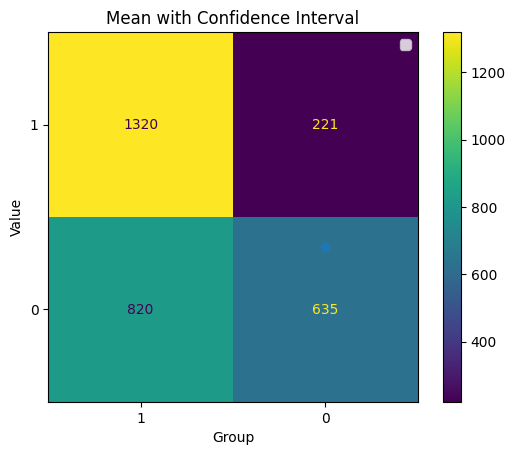

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1541
           1       0.88      0.74      0.80      1455

    accuracy                           0.82      2996
   macro avg       0.83      0.82      0.82      2996
weighted avg       0.83      0.82      0.82      2996

Node Labels:
 Annotation(0.624883, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6988\nvalue = [3499, 3489]\nclass = 0')


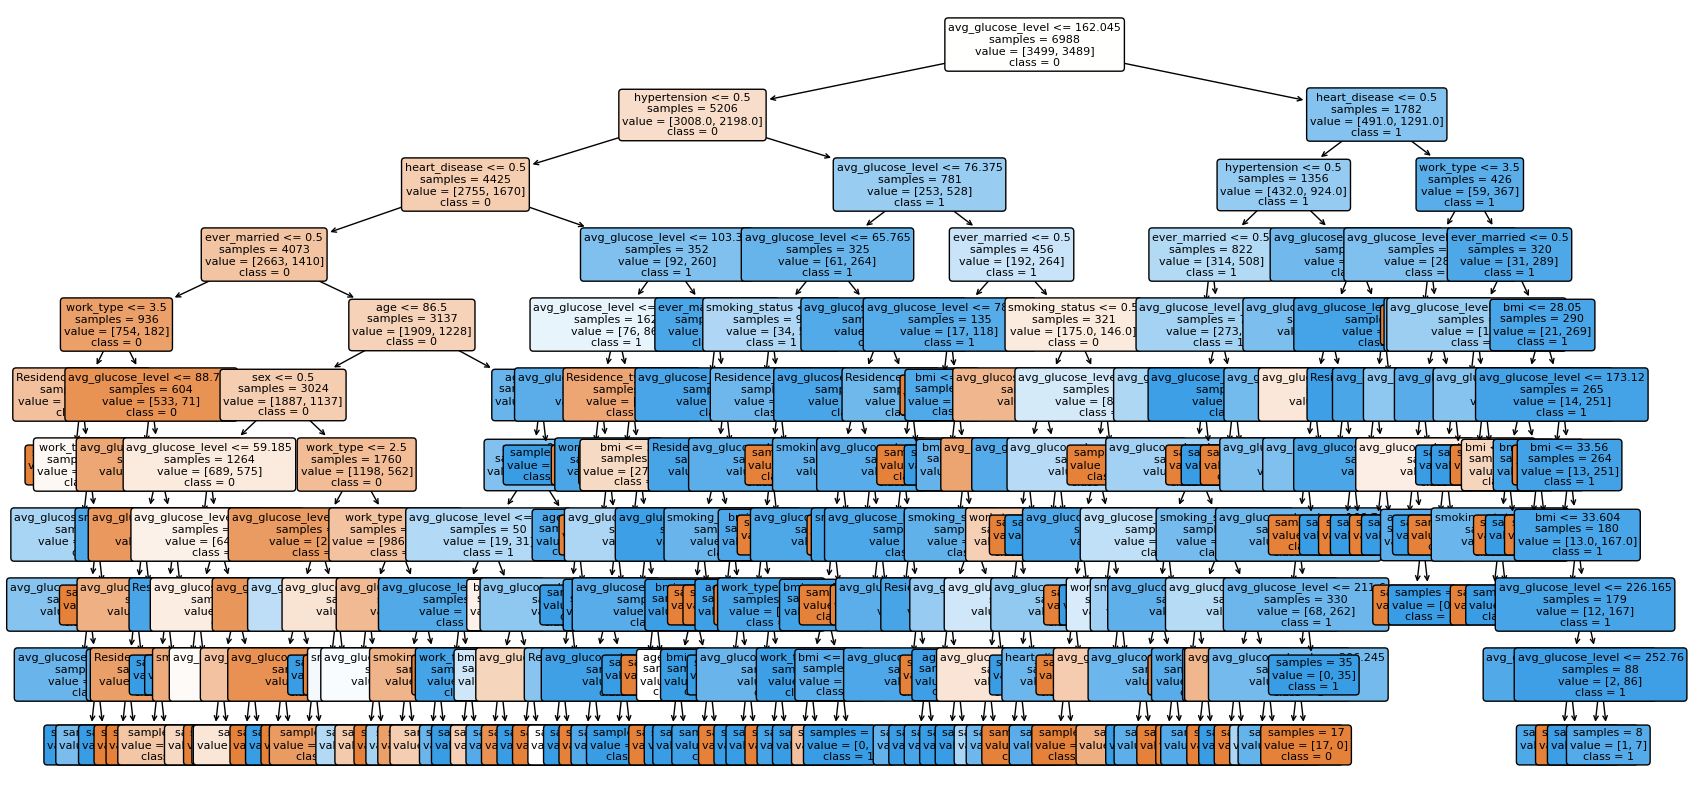

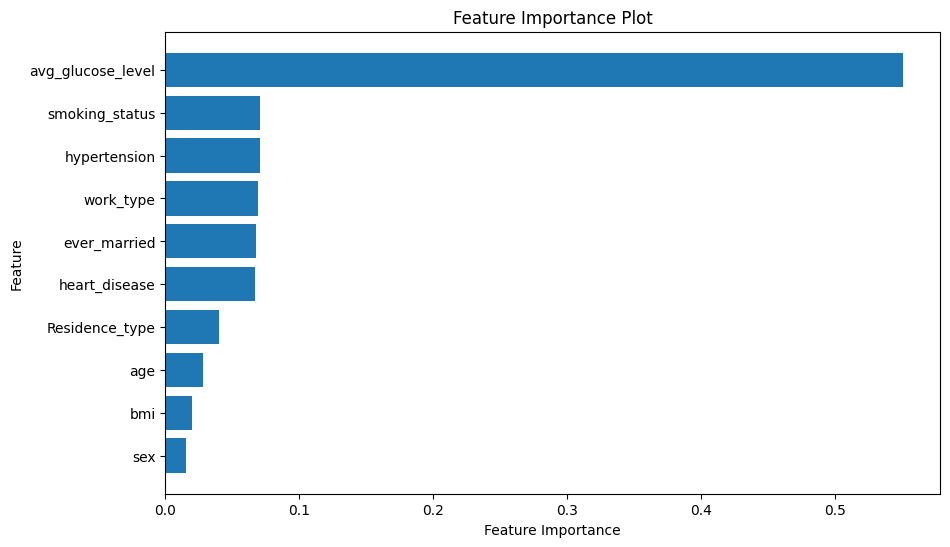

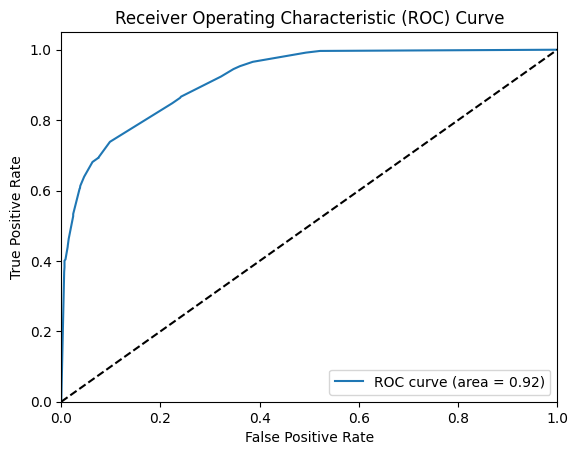

AUC Score: 0.916717176109591


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.82, 0.8, 0.8, 0.7733333333333333, 0.7933333333333333, 0.8033333333333333, 0.7892976588628763, 0.7926421404682275, 0.8060200668896321, 0.7692307692307693]
Mean accuracy: 0.7947190635451504
95% confidence interval: (0.7839504964997346, 0.8054876305905663)


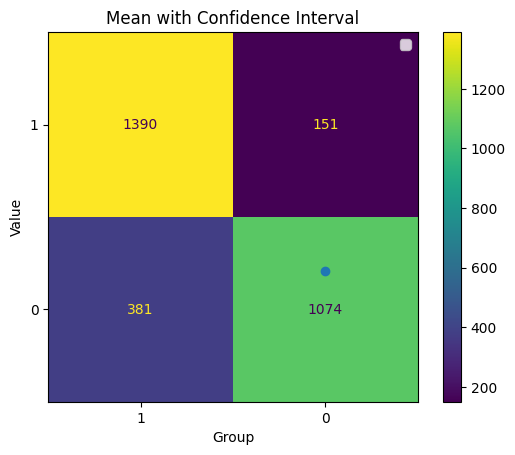

In [30]:
y_prob, y_test, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



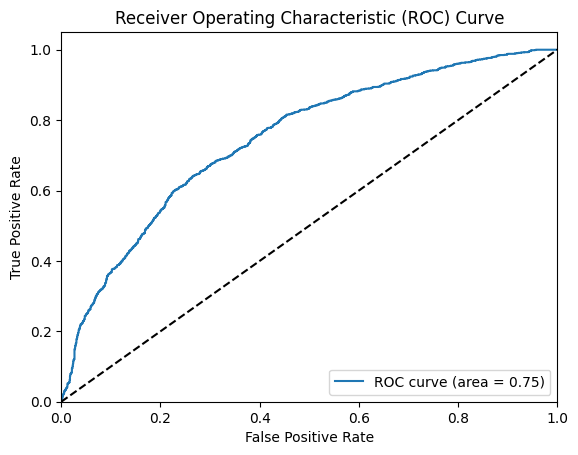

AUC Score: 0.7470063398828359


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.69, 0.67, 0.6866666666666666, 0.64, 0.65, 0.6366666666666667, 0.6688963210702341, 0.68561872909699, 0.6688963210702341, 0.6655518394648829]
Mean accuracy: 0.6662296544035674
95% confidence interval: (0.6527135921684311, 0.6797457166387038)


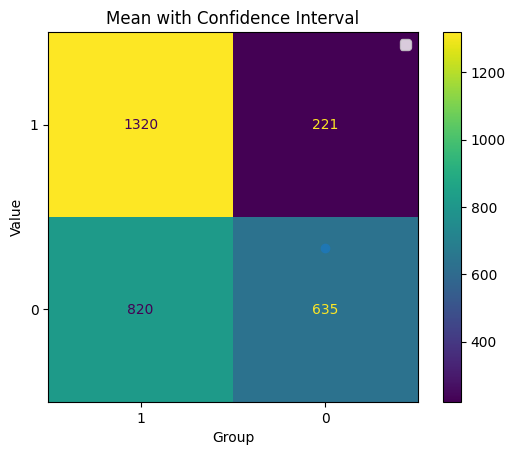

--------------------------------------


In [31]:
y_prob, y_test, svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

# Categorical

In [32]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


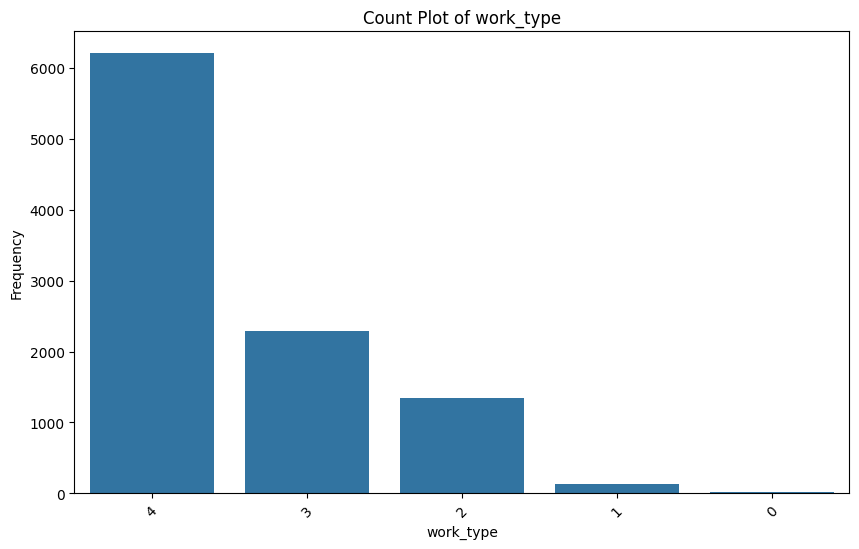

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 50, df)

Valore meno frequente:  0


Value counts:
work_type
0    4999
4    3099
3    1127
2     693
1      66
Name: count, dtype: int64
Outliers detected: [0, 4, 3, 2, 1]
Outliers found:


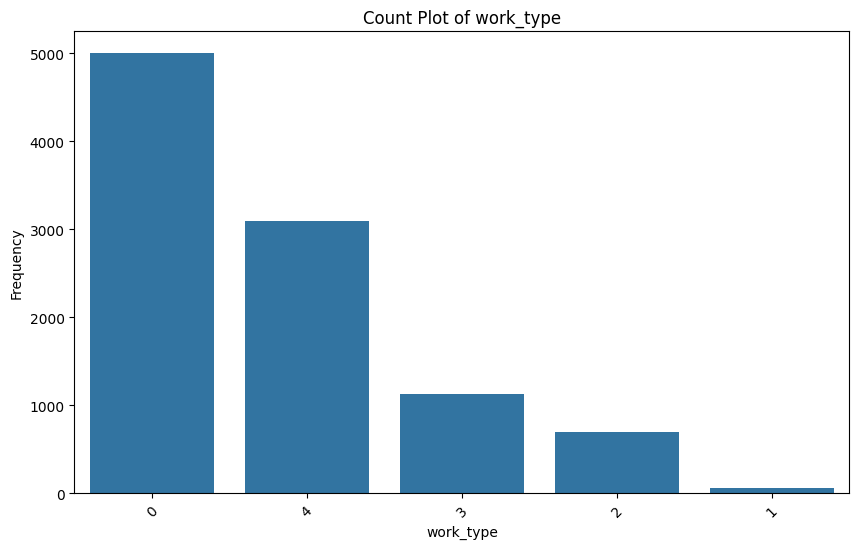

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1541
           1       0.79      0.87      0.83      1455

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

Node Labels:
 Annotation(0.624298, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


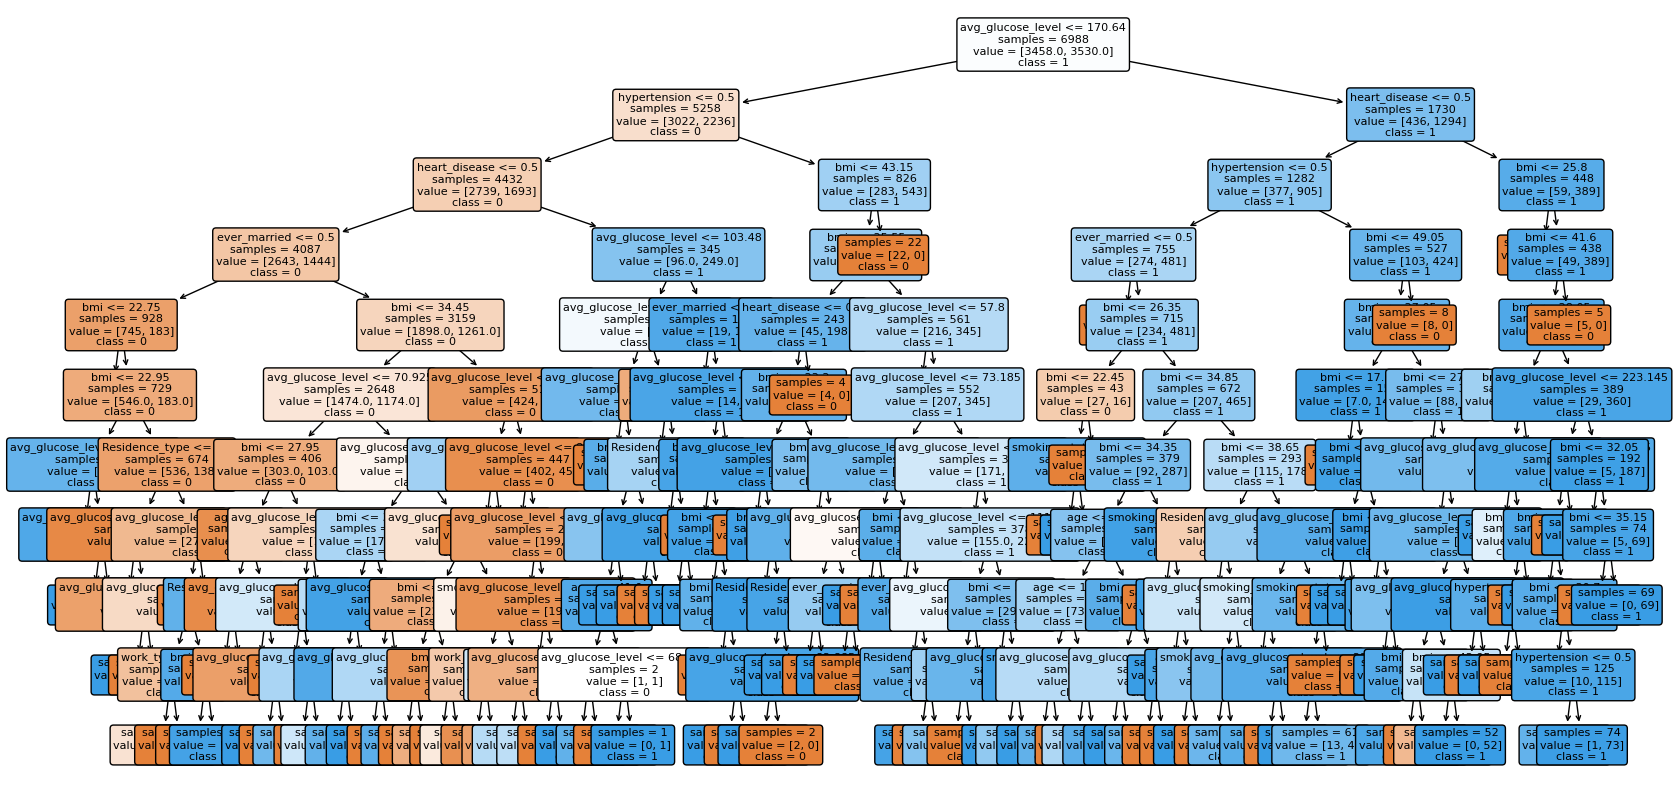

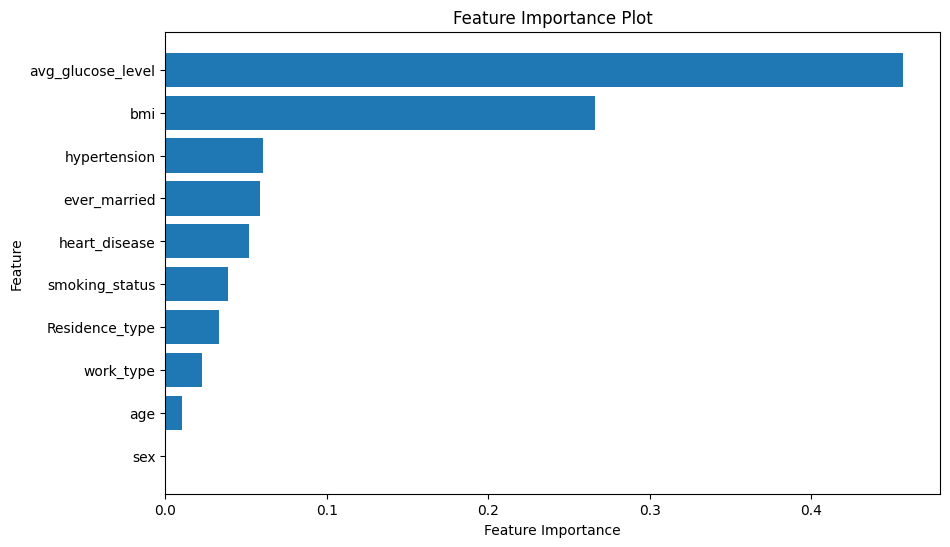

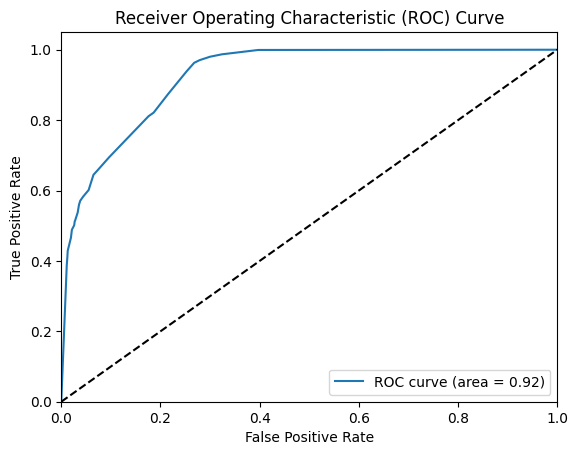

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.924047846825933
Accuracy for each fold: [0.7866666666666666, 0.8633333333333333, 0.8233333333333334, 0.8266666666666667, 0.8, 0.7933333333333333, 0.802675585284281, 0.8193979933110368, 0.802675585284281, 0.7926421404682275]
Mean accuracy: 0.8110724637681159
95% confidence interval: (0.7947117300074157, 0.8274331975288162)


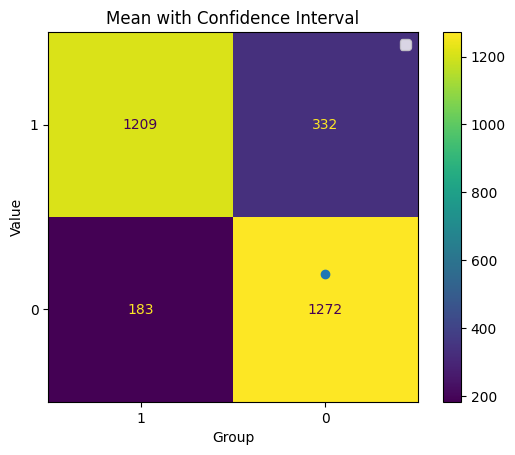

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



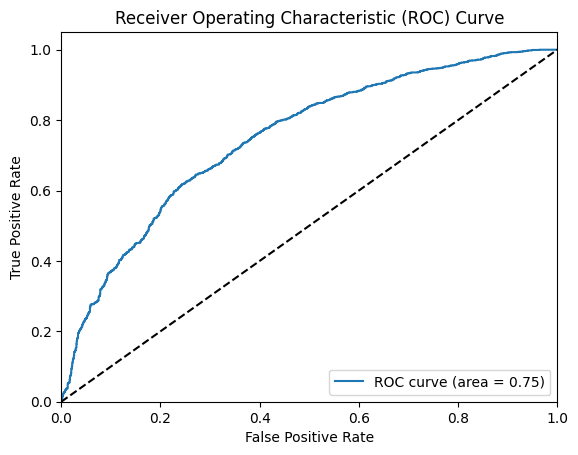

AUC Score: 0.7482185665130199


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7133333333333334, 0.7166666666666667, 0.6733333333333333, 0.67, 0.6366666666666667, 0.6733333333333333, 0.6321070234113713, 0.6789297658862876, 0.6187290969899666, 0.68561872909699]
Mean accuracy: 0.6698717948717948
95% confidence interval: (0.6465363488095165, 0.6932072409340732)


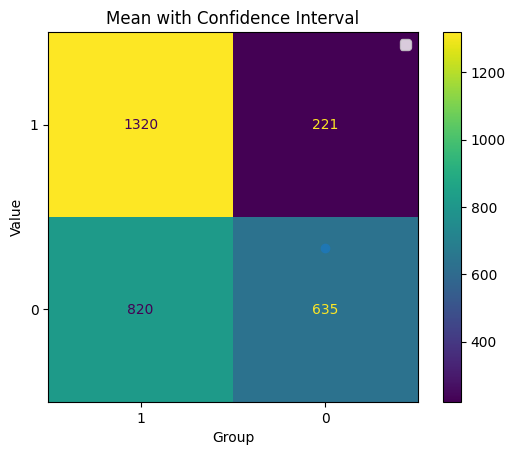

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm,df_original)

print('--------------------------------------')

## Conclusion

### ROC Curve - Decision Tree

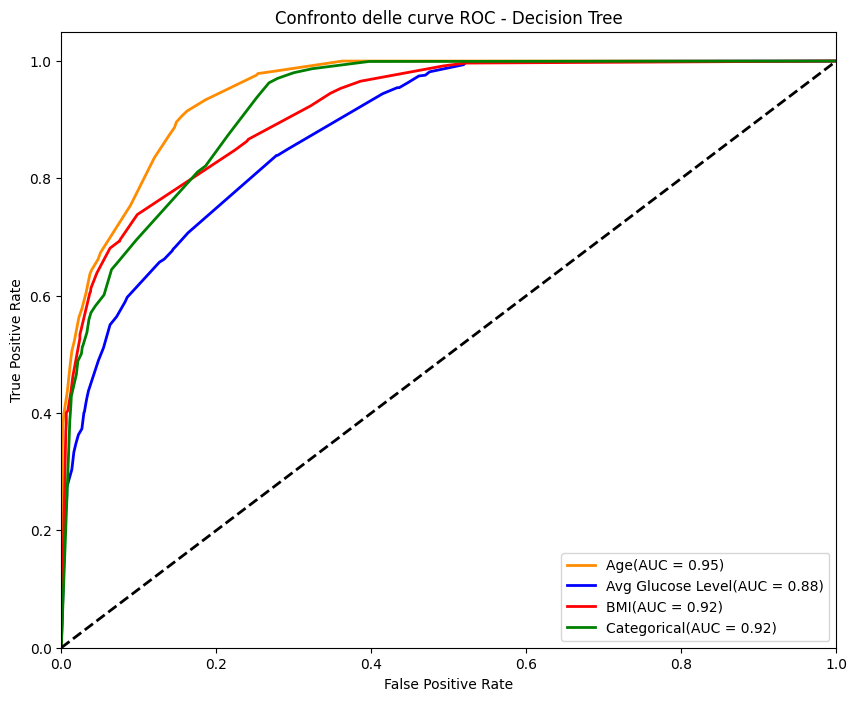

In [38]:
ML_algorithms.plot_roc_curve_conlusion_dt(y_pred_prob_age_dt, y_test_age_dt, y_pred_prob_glucose_dt, y_test_glucose_dt,
                                          y_pred_prob_bmi_dt, y_test_bmi_dt,  y_pred_prob_categorical_dt, y_test_categorical_dt)

### ROC Curve - Support Vector Machine

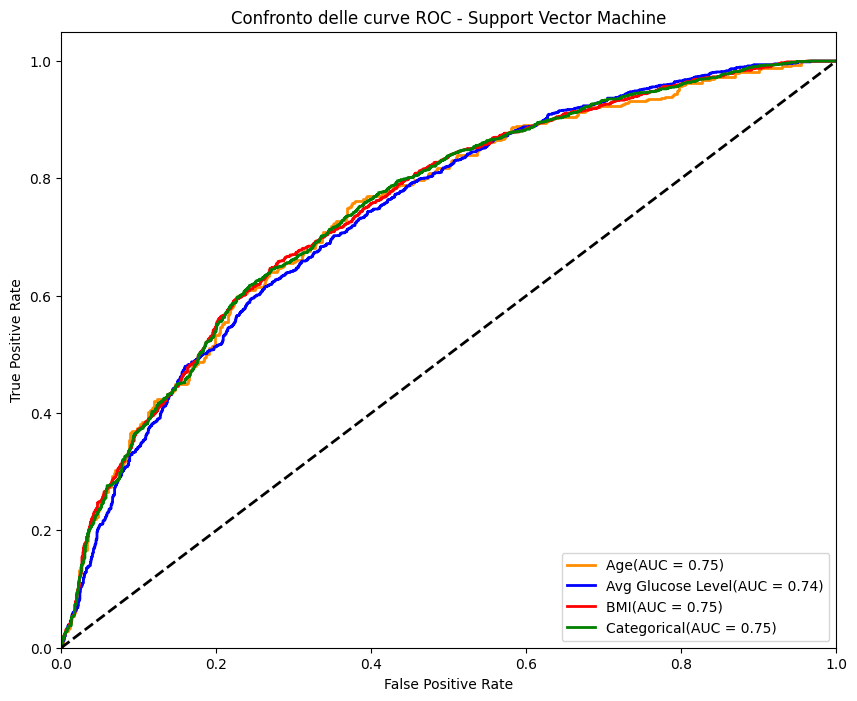

In [39]:
ML_algorithms.plot_roc_curve_conlusion_svm(y_pred_prob_age_svm, y_test_age_svm, y_pred_prob_glucose_svm, y_test_glucose_svm,
                                          y_pred_prob_bmi_svm, y_test_bmi_svm,  y_pred_prob_categorical_svm, y_test_categorical_svm)